1. Import Libraries and Define Auxiliary Functions

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Read the SpaceX dataset into a Pandas dataframe

In [16]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


3. Let's see how the FlightNumber (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome

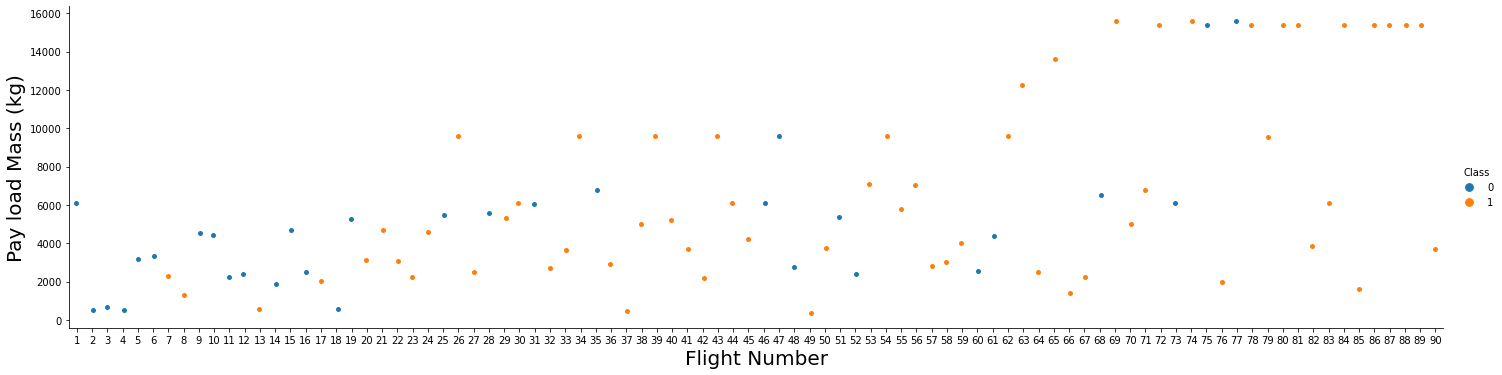

In [17]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 4)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

<b>Observation:</b> We see that different launch sites have different success rates. CCAFS LC-40, has a success rate of 60 %, while KSC LC-39A and VAFB SLC 4E has a success rate of 77%

4. Visualize the relationship between Flight Number and Launch Site

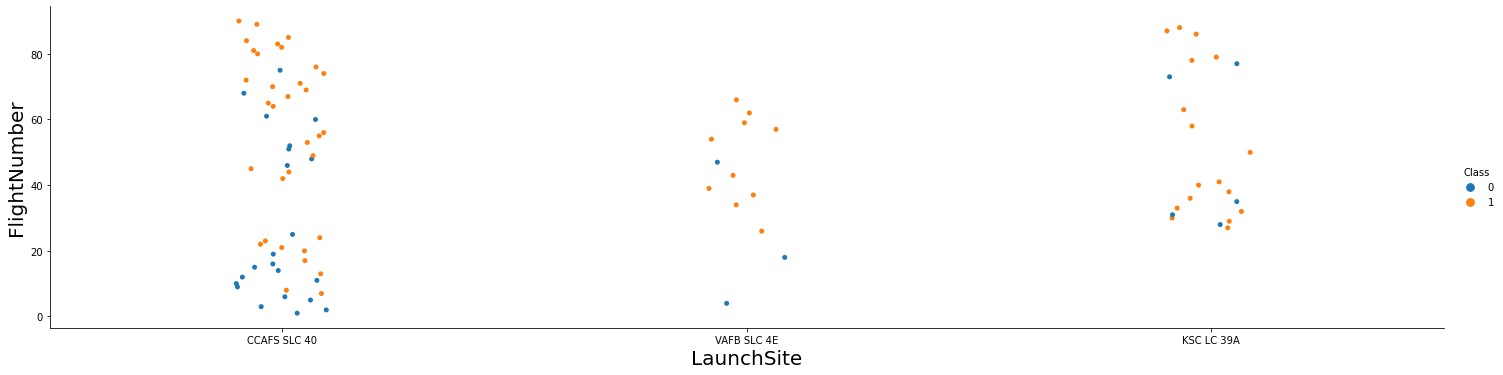

In [18]:
sns.catplot(y='FlightNumber', x='LaunchSite', hue='Class', data=df, aspect=4)
plt.xlabel('LaunchSite', fontsize=20)
plt.ylabel('FlightNumber', fontsize=20)
plt.show()

<b>Observation:</b> CCAFS SLC 40 has More success Rate at Fligh Number 60 above, where VAFB SLC 4E has More success rate between Flight Number 30 to 70, and KSC LC 39A has More success Rate at 30 above

5. Visualize the relationship between Payload and Launch Site

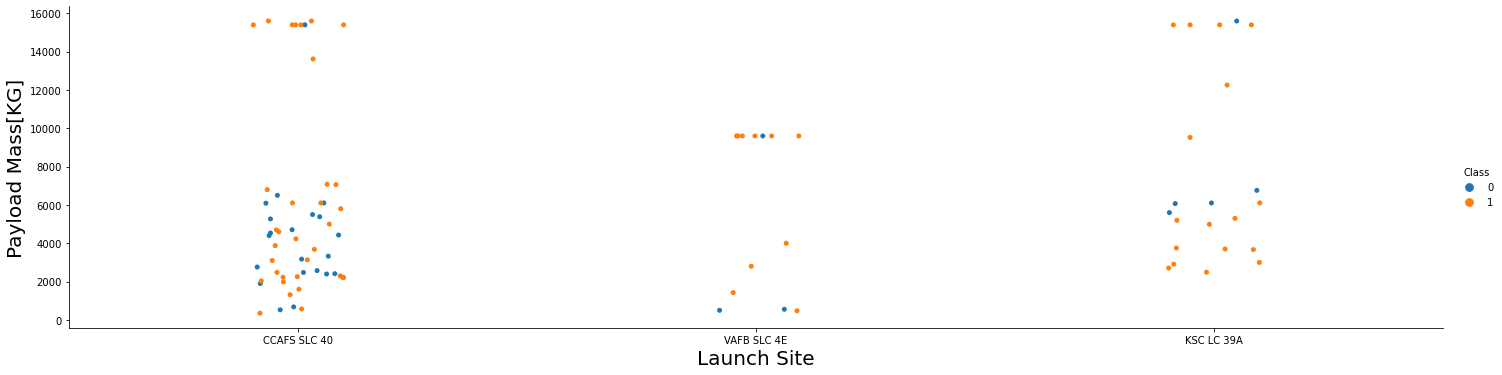

In [19]:
sns.catplot(x='LaunchSite', y='PayloadMass', data=df, hue='Class', aspect=4)
plt.xlabel('Launch Site', fontsize=20)
plt.ylabel('Payload Mass[KG]', fontsize=20)
plt.show()

<b>Observation:</b> Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC launchsite there are no rockets launched for heavypayload mass(greater than 10000).

6. Visualize the relationship between success rate of each orbit type,  to visually check if there are any relationship between success rate and orbit type.

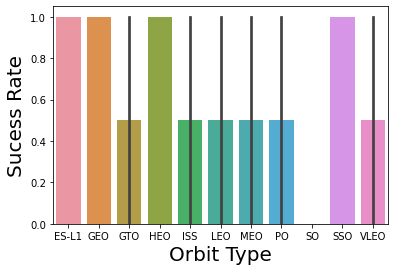

In [20]:
New_Data = df.groupby(['Orbit', 'Class'])['Class'].agg(['mean']).reset_index()
sns.barplot(y="Class", x="Orbit", data=New_Data)

plt.xlabel("Orbit Type",fontsize=20)
plt.ylabel("Sucess Rate",fontsize=20)
plt.show()

<b>Observation:</b> Orbit Type ES-L1, GEO, HEO & SSO having Highest success rate compare to other orbit types

7. Visualize the relationship between FlightNumber and Orbit type.

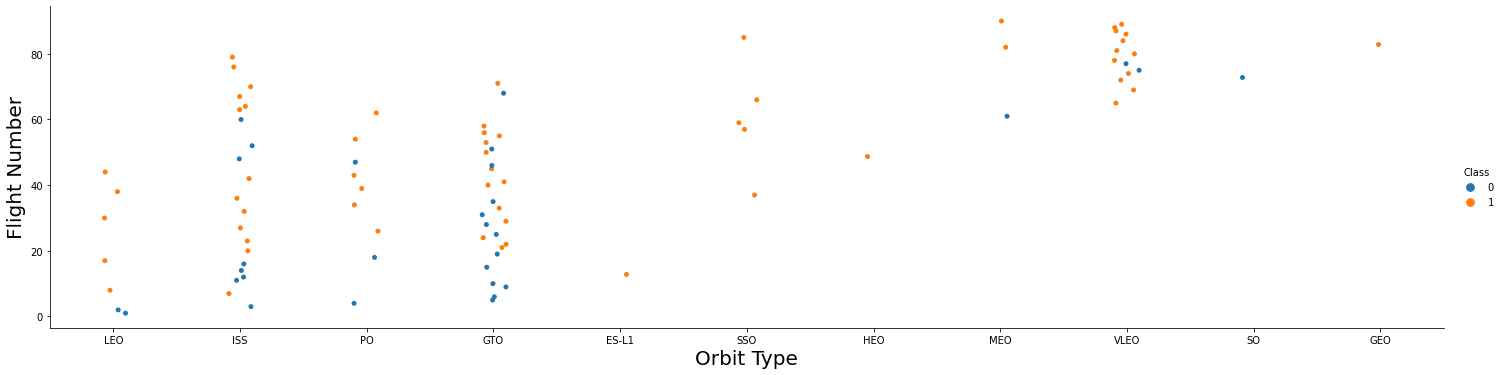

In [21]:
sns.catplot(x="Orbit",y="FlightNumber", data=df, hue='Class', aspect=4)
plt.xlabel('Orbit Type', fontsize=20)
plt.ylabel('Flight Number', fontsize=20)
plt.show()

<b>Observation:</b> We can Observe that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbi

8. Visualize the relationship between Payload and Orbit type

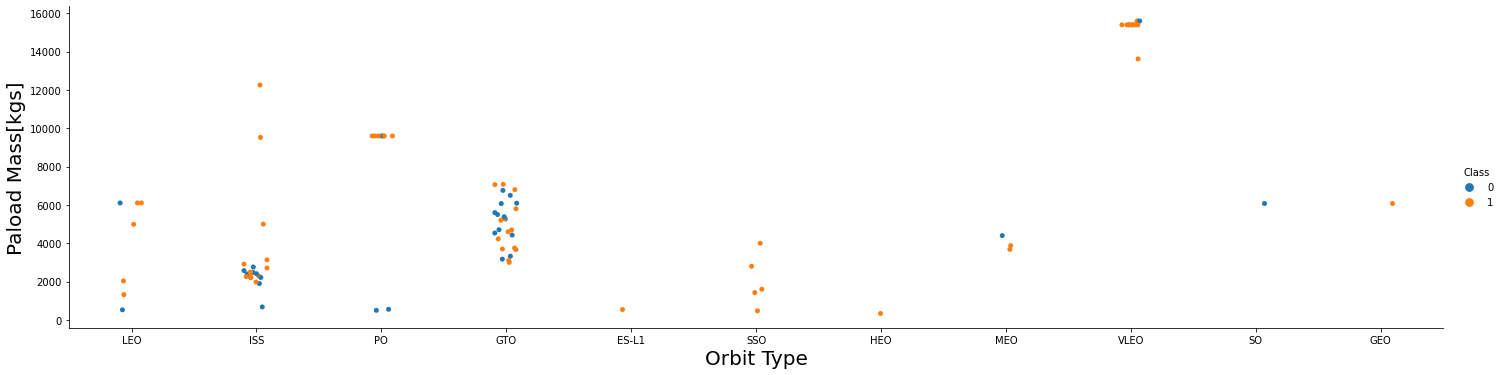

In [29]:
sns.catplot(x='Orbit', y='PayloadMass', data=df, hue='Class', aspect=4)
plt.xlabel('Orbit Type', fontsize=20)
plt.ylabel('Paload Mass[kgs]', fontsize=20)
plt.show()

<b>Observation:</b>With heavy payloads the successful landing or positive landing rate are more for LEO, ISS and PO [Polar]

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.

9. Visualize the launch success yearly trend

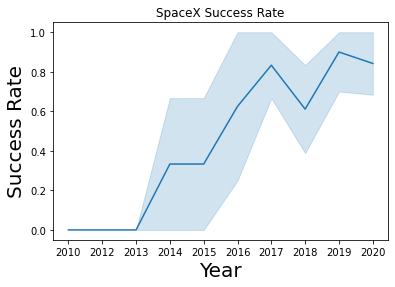

In [23]:
# Function to Extract years from the date
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

year=[]
df1 = df.copy()
year = Extract_year(df['Date'])
df1["Date"] = year

sns.lineplot(data=df1, x="Date", y="Class")
plt.title("SpaceX Success Rate")
plt.xlabel("Year",fontsize=20)
plt.ylabel("Success Rate",fontsize=20)
plt.show()

<b>Observation:</b> We can observe that the sucess rate since 2013 kept increasing till 2020

<h3>Features Engineering</h3>
    
10. Now we obtain some preliminary insights about how each important variable would affect the success rate, So Let's select the features that will be used in success prediction in the future module.

In [24]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


11. Create dummy variables to categorical columns
<br />
Let's Apply OneHotEncoder to the column "Orbits", "LaunchSite", "LandingPad", and "Serial" and Assign the value to the variable features_one_hot.
<br />
So the result dataframe includes all features including the encoded ones.


In [25]:
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


12. Cast all numeric columns to float64 to make all numerical values to same type for better results

In [26]:
features_one_hot.astype(float)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15400.000000,6.0,1.0,1.0,1.0,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


13. Export the results to a CSV file

In [27]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)